# Performing PCA on food preferences

Let's do PCA on our food preferences, and see what we get. As with clustering, this doesn't work with `NaN`s, so we'll need to replace those with the means. So, to quickly run through this...

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../datasets/foodsAndMovies.csv.gz')
foodFrame = df[['Broccoli', 'Mushrooms', 'Beef Tacos', 'Salads', 'Black Licorice', 'Steak', 'Grilled Chicken', 'Mayonnaise', 'Candy Corn', 'Pulled Pork', 'Spicy Mustard', 'Raw Oysters', 'Bananas', 'Avocado', 'Eggs', 'Olives', 'Tofu', 'Cottage Cheese']]
means=foodFrame.mean()
for col in foodFrame.columns:
    foodFrame[col]=foodFrame[col].fillna(means[col])

/tmp/ipykernel_2488711/1985869740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foodFrame[col]=foodFrame[col].fillna(means[col])


OK, so to be clear, the clustering told us where there were pockets of people with similar preferences. PCA, on the other hand, tells us along what axes does our data change the most? Both result in 18-dimensional vectors, but they mean very different things.

The first question is how low-dimensional is our data, really? How many singular values are there? Well, I'm going to center the data first.

In [2]:
foodFrame=foodFrame-foodFrame.mean()
foodFrame.head()

,Broccoli,Mushrooms,Beef Tacos,Salads,Black Licorice,Steak,Grilled Chicken,Mayonnaise,Candy Corn,Pulled Pork,Spicy Mustard,Raw Oysters,Bananas,Avocado,Eggs,Olives,Tofu,Cottage Cheese
0,0.369565,0.867003,0.916248,-0.91806,0.000000,0.449082,-0.36227,1.040404,-1.547899,0.724832,2.005119,1.391867,-0.128763,0.099494,-0.321667,1.30137,-4.630996e-01,-0.358423
1,-1.630435,-2.132997,-0.083752,-1.91806,-0.752613,0.449082,-0.36227,0.040404,0.452101,-0.275168,0.005119,-0.608133,-0.128763,-0.900506,0.678333,-0.69863,1.536900e+00,0.641577
2,0.369565,-1.132997,0.916248,0.08194,1.247387,0.449082,0.63773,-1.959596,0.452101,-0.275168,0.000000,0.000000,-2.128763,0.000000,0.678333,0.00000,-4.440892e-16,0.000000
3,0.369565,0.867003,-0.083752,0.08194,-0.752613,-0.550918,-0.36227,1.040404,-1.547899,-0.275168,1.005119,1.391867,-0.128763,0.099494,-0.321667,-0.69863,1.536900e+00,-0.358423
4,0.369565,-0.132997,0.916248,0.08194,2.247387,0.449082,-0.36227,-0.959596,-1.547899,0.724832,1.005119,-0.608133,-2.128763,-0.900506,0.678333,0.30137,-4.630996e-01,-1.358423


OK, so everybody's scores now indicate how much more or less than the average person they like that food, so a person with all zeros is an entirely average person. Now, I'm going to take the SVD and look at the singular values to get a sense of if there's a lower-dimensional structure here.

In [3]:
import numpy as np
u,s,vh = np.linalg.svd(foodFrame)

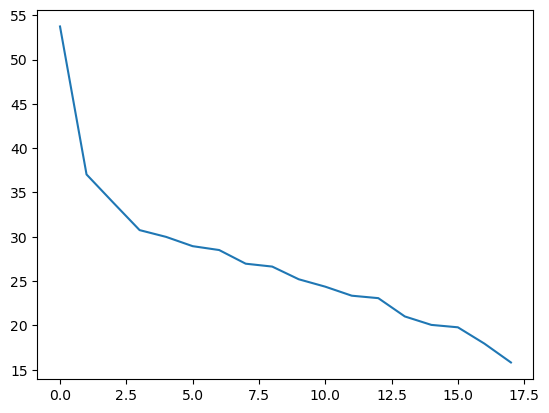

In [4]:
import matplotlib.pyplot as plt
plt.plot(s)

OK, so the first two or three are much more important than the others, though there are none that aren't important at all. Let's take a look at the first component first. Now, a component, remember, is a column of $V$, and will be a vector in 18-dimensional space (because we have 18 features here).

[('Broccoli', np.float64(0.10106731531338133)), ('Mushrooms', np.float64(0.4245306698157227)), ('Beef Tacos', np.float64(0.05110163434909602)), ('Salads', np.float64(0.10675115186089569)), ('Black Licorice', np.float64(0.08957554050140484)), ('Steak', np.float64(0.01842556551242476)), ('Grilled Chicken', np.float64(-0.006093201714661926)), ('Mayonnaise', np.float64(0.19695025427516655)), ('Candy Corn', np.float64(0.014563176128566642)), ('Pulled Pork', np.float64(0.04520661322660573)), ('Spicy Mustard', np.float64(0.3865048454593908)), ('Raw Oysters', np.float64(0.3672976299549796)), ('Bananas', np.float64(0.08720608740303676)), ('Avocado', np.float64(0.2820558804622032)), ('Eggs', np.float64(0.12256825661246917)), ('Olives', np.float64(0.4144571056531625)), ('Tofu', np.float64(0.3109674745669337)), ('Cottage Cheese', np.float64(0.3019171805772412))]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Broccoli'),
  Text(1, 0, 'Mushrooms'),
  Text(2, 0, 'Beef Tacos'),
  Text(3, 0, 'Salads'),
  Text(4, 0, 'Black Licorice'),
  Text(5, 0, 'Steak'),
  Text(6, 0, 'Grilled Chicken'),
  Text(7, 0, 'Mayonnaise'),
  Text(8, 0, 'Candy Corn'),
  Text(9, 0, 'Pulled Pork'),
  Text(10, 0, 'Spicy Mustard'),
  Text(11, 0, 'Raw Oysters'),
  Text(12, 0, 'Bananas'),
  Text(13, 0, 'Avocado'),
  Text(14, 0, 'Eggs'),
  Text(15, 0, 'Olives'),
  Text(16, 0, 'Tofu'),
  Text(17, 0, 'Cottage Cheese')])

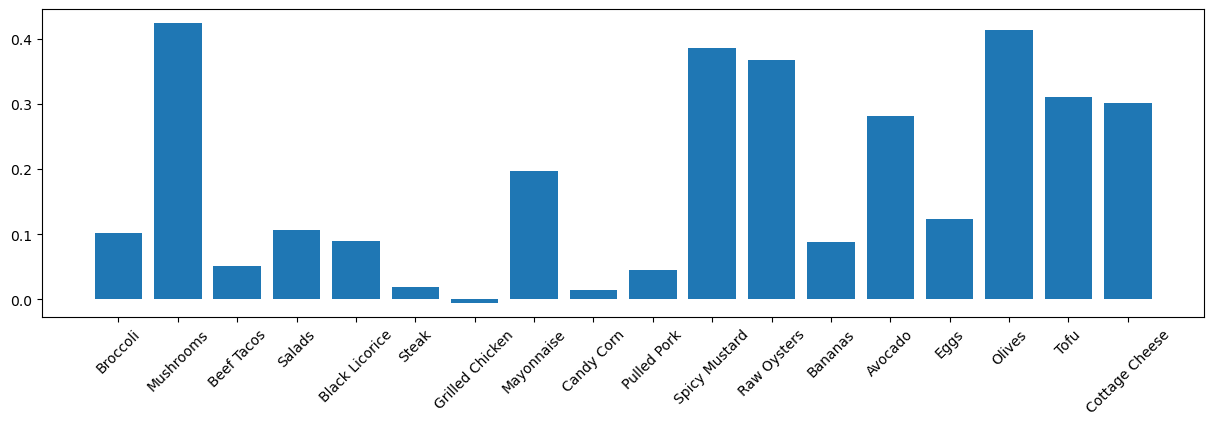

In [5]:
plt.rcParams['figure.figsize']=(15,4)
print(list(zip(foodFrame.columns,vh[0,:])))
plt.bar(foodFrame.columns,vh[0,:]) # First row of V^T is the first column of V
plt.xticks(rotation=45)

So, what does this mean, and how can we interpret it? Remember, this is the vector, or direction, along which we see the greatest amount of change in the dataset. About half of the data is in the positive direction of this vector, and half is in the negative direction. Big numbers indicate lots of change along that axis. Mushrooms, for example, have a lot of variation, as do olives. Grilled chicken, not so much.

Mushrooms and Olives also are not only large in magnitude, but both positive. This means that as one increases, the other tends to increase (similarly, as one decreases, the other tends to decrease). So, someone who likes mushrooms more than average, probably also likes olives more than average. Someone who dislikes mushrooms probably also dislikes olives.

In fact, these are all positive (except for grilled chicken, which is essentially 0), meaning that we can interpret the primary component as indicating that being enthusiastic about some foods suggests you're likely to be enthusiastic about others. That makes sense!

What about the second component?

[('Broccoli', np.float64(-0.060134950221542145)), ('Mushrooms', np.float64(-0.37365696373638957)), ('Beef Tacos', np.float64(0.23653095303920132)), ('Salads', np.float64(0.09536268427043006)), ('Black Licorice', np.float64(0.21513628065615711)), ('Steak', np.float64(0.13068028760203654)), ('Grilled Chicken', np.float64(0.1634531522595968)), ('Mayonnaise', np.float64(0.18535128209179033)), ('Candy Corn', np.float64(0.6182736838498271)), ('Pulled Pork', np.float64(0.25280750096145466)), ('Spicy Mustard', np.float64(0.15810492470660215)), ('Raw Oysters', np.float64(-0.31573354833495787)), ('Bananas', np.float64(0.12643285684783462)), ('Avocado', np.float64(-0.045237979062551954)), ('Eggs', np.float64(0.09916241631192052)), ('Olives', np.float64(0.22585687032164095)), ('Tofu', np.float64(-0.06289457331740052)), ('Cottage Cheese', np.float64(0.11661706058527292))]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Broccoli'),
  Text(1, 0, 'Mushrooms'),
  Text(2, 0, 'Beef Tacos'),
  Text(3, 0, 'Salads'),
  Text(4, 0, 'Black Licorice'),
  Text(5, 0, 'Steak'),
  Text(6, 0, 'Grilled Chicken'),
  Text(7, 0, 'Mayonnaise'),
  Text(8, 0, 'Candy Corn'),
  Text(9, 0, 'Pulled Pork'),
  Text(10, 0, 'Spicy Mustard'),
  Text(11, 0, 'Raw Oysters'),
  Text(12, 0, 'Bananas'),
  Text(13, 0, 'Avocado'),
  Text(14, 0, 'Eggs'),
  Text(15, 0, 'Olives'),
  Text(16, 0, 'Tofu'),
  Text(17, 0, 'Cottage Cheese')])

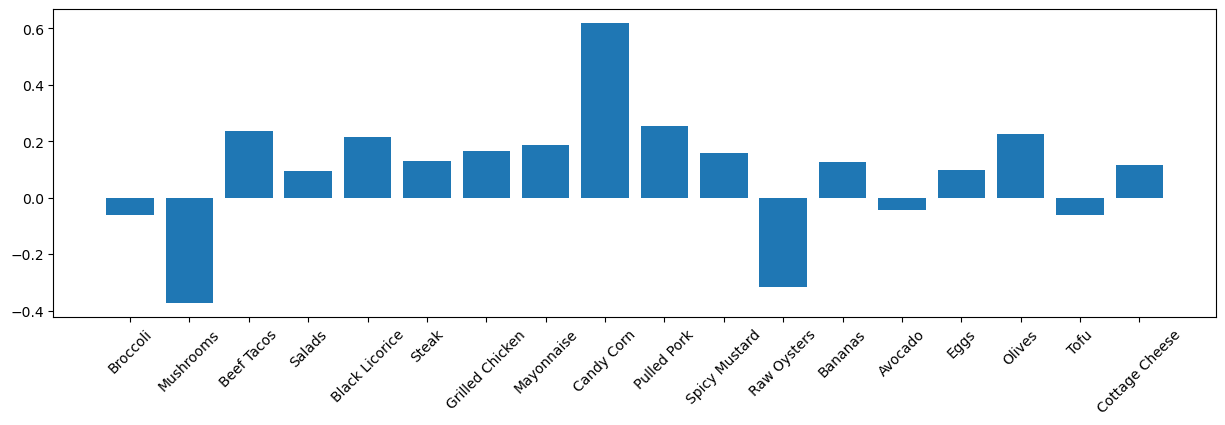

In [6]:
print(list(zip(foodFrame.columns,vh[1,:])))
plt.bar(foodFrame.columns,vh[1,:]) # First row of V^T is the first column of V
plt.xticks(rotation=45)

Now, in determining someone's food ratings, the most important thing is the first principal component, and how far along you are in that in a positive or negative direction. Once that's been decided, this vector is the next direction to move along. This vector is orthogonal to the first, meaning it points at a 90 degree angle. So, suppose the first principal component doesn't fully describe you. Your preferences aren't quite in line with what that's saying. Then, the thing that most likely differentiates you from the pattern of most people is the difference in your opinions between candy corn or mushrooms. In other words, people who differentiate from that first principal component do so by having strong negative correlations between their likes of candy corn and mushrooms or oysters.

Differentiate any more? We can look at the third.

[('Broccoli', np.float64(0.005715019674813854)), ('Mushrooms', np.float64(0.1389412894231247)), ('Beef Tacos', np.float64(-0.27931965453584867)), ('Salads', np.float64(-0.06300657140281994)), ('Black Licorice', np.float64(0.3305145184599198)), ('Steak', np.float64(-0.24435827777760433)), ('Grilled Chicken', np.float64(-0.2105430750194666)), ('Mayonnaise', np.float64(-0.4153516431367033)), ('Candy Corn', np.float64(0.12411987271329718)), ('Pulled Pork', np.float64(-0.22860516008358883)), ('Spicy Mustard', np.float64(0.02188222067449243)), ('Raw Oysters', np.float64(-0.3304944090563239)), ('Bananas', np.float64(-0.13778605874789118)), ('Avocado', np.float64(-0.20437414227973172)), ('Eggs', np.float64(-0.18849494837843553)), ('Olives', np.float64(0.4715719283798007)), ('Tofu', np.float64(0.1289306306410765)), ('Cottage Cheese', np.float64(-0.014778285205475753))]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Broccoli'),
  Text(1, 0, 'Mushrooms'),
  Text(2, 0, 'Beef Tacos'),
  Text(3, 0, 'Salads'),
  Text(4, 0, 'Black Licorice'),
  Text(5, 0, 'Steak'),
  Text(6, 0, 'Grilled Chicken'),
  Text(7, 0, 'Mayonnaise'),
  Text(8, 0, 'Candy Corn'),
  Text(9, 0, 'Pulled Pork'),
  Text(10, 0, 'Spicy Mustard'),
  Text(11, 0, 'Raw Oysters'),
  Text(12, 0, 'Bananas'),
  Text(13, 0, 'Avocado'),
  Text(14, 0, 'Eggs'),
  Text(15, 0, 'Olives'),
  Text(16, 0, 'Tofu'),
  Text(17, 0, 'Cottage Cheese')])

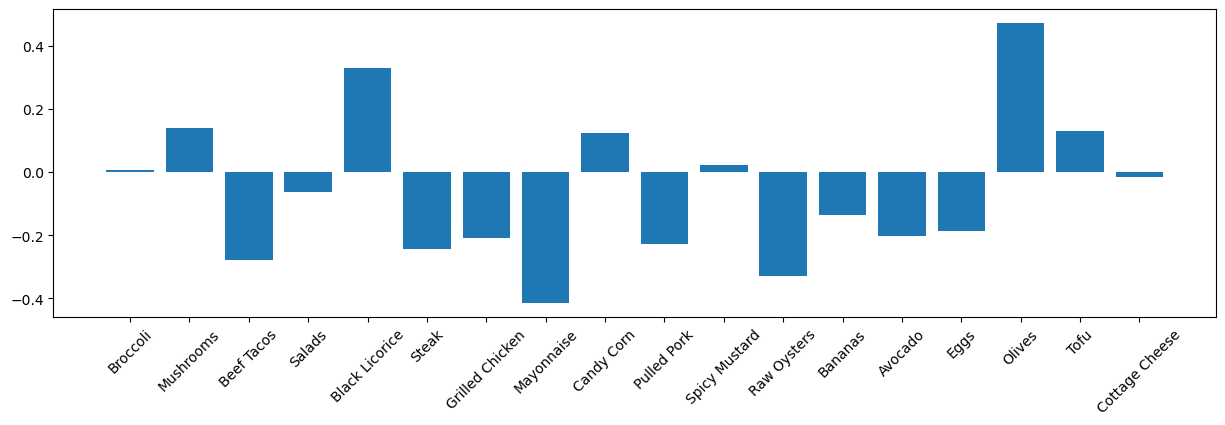

In [7]:
print(list(zip(foodFrame.columns,vh[2,:])))
plt.bar(foodFrame.columns,vh[2,:]) # First row of V^T is the first column of V
plt.xticks(rotation=45)

## So how much error is there in a given rating if we use this?

This is your lab, but rather than looking at pictures, I'm calculating the root mean squared error between the original and reconstructed matrices. Here's a low-rank reconstruction.

[np.float64(0.2979616388895001), np.float64(0.3547471172702624), np.float64(0.40806119949049663), np.float64(0.46429868204586866), np.float64(0.5155709873809295), np.float64(0.5661553722333906), np.float64(0.615685285908723), np.float64(0.6666662980033968), np.float64(0.715140540626904), np.float64(0.7656916802802961), np.float64(0.8145281534682755), np.float64(0.8638911217269966), np.float64(0.9129318026315657), np.float64(0.9691105930573582), np.float64(1.0322479666944806)]


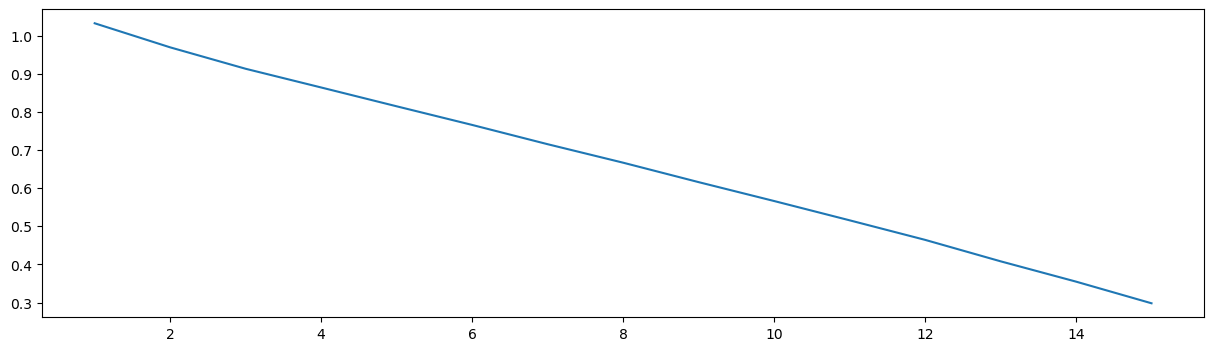

In [8]:
def rmse(A,Ahat):
    Atilde=A-Ahat
    Atilde=Atilde*Atilde #elementwise multiplication
    (n,m)=Atilde.shape
    mse=sum(sum(Atilde))/(n*m)
    return np.sqrt(mse)
            

numPCs=range(15,0,-1)
u,s,vh = np.linalg.svd(foodFrame)
lenS=len(s)
rmses=[]
for numPC in numPCs:
    s[numPC:]=np.zeros(lenS-numPC)
    Sigma=np.zeros((u.shape[0],lenS))
    Sigma[:lenS,:]=np.diag(s)
    foodRecon=u@Sigma@vh
    rmses.append(rmse(foodRecon,foodFrame.to_numpy()))
print(rmses)
plt.plot(numPCs,rmses)

OK, so with 1 principal component, our best guess of a person's ranking of any given food is, on average, off by a whole star. That's a lot, but it's not THAT big. So even one principal component is pretty good. To get down to half a star, we need about 11 principal components. That's kind of a bunch in an 18-dimensional space! This isn't that low-dimensional under the hood.

## PCA for dimensionality reduction and visualization

People can learn a lot by looking at data. Unfortunately, it's very hard to look at 18 (or whatever) -dimensional data! We can only picture things if they're in two or three dimensions. So: are there two or three dimensions we can project our points into so that the relationships between the points are as preserved as possible? Well, this is exactly what the first two principle components can do.

Each of our people in our data set is represented with a point in 18-dimensional space. In our first two principle components, we've defined two vectors with a vector space which is a plane. This plane is a 2-dimensional surface in 18-dimensional space. Every point in our original 18-dimensional space has a corresponding point on that plane which is as close as possible to it. This is called the point's projection onto the plane. One of the properties of the principle components is that the sum of the distances from every point to every point's projection is as small as possible. So, we sacrifice the minimum amount of information by projecting onto the first two principle components' plane than we would projecting onto any other plane.

So, let's do that. I'm just going to use sklearn for this:

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
transformed=pca.fit_transform(foodFrame)
print(transformed)

[[ 2.13061768 -0.69234975]
 [-1.35556266  0.85224339]
 [-0.76624503  0.70181007]
 ...
 [-3.22993079 -1.84161964]
 [-3.12651394  0.58886518]
 [ 3.61891621  1.01464447]]


So now every 18-dimensional point is defined by how far down the first PC you have to go, and then how far down the second PC you have to go, to get to the point on the plane which is as close as possible to the real 18-dimensional point. We can plot this:

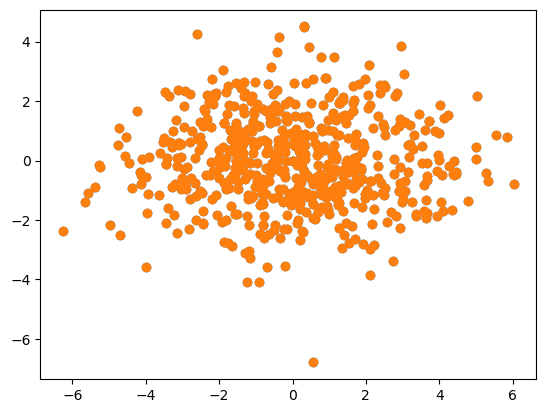

In [11]:
plt.rcParams.update(plt.rcParamsDefault)
plt.scatter(transformed[:,0],transformed[:,1])
plt.show()

No wonder the clustering wasn't very interesting! I see no clusters, really.

In [12]:
pca.explained_variance_ratio_

array([0.19976644, 0.09489867])

On the other hand, these two dimensions only explain a little less than 30% of the variance in the data set - it's not particularly 2-dimensional. So, there could still be a lot going on in the dimensions that have been projected out. Let's try this again with some dataset that does have some low-dimensional stuff going on - MNIST. I'm going to load some datapoints from MNIST, and we'll do the same thing.

In [14]:
mnistDir='/home/scs/taylor/f25si470/class/05SVD/mnist'
import idx2numpy
pics=idx2numpy.convert_from_file(mnistDir+'/train-images-idx3-ubyte')
labels=idx2numpy.convert_from_file(mnistDir+'/train-labels-idx1-ubyte')

indices3=np.nonzero(labels==3)[0]
indices4=np.nonzero(labels==4)[0]

indices=np.concatenate((indices3,indices4))
indices.shape

(11973,)

In [15]:
values=pics[indices,:,:]
values=np.reshape(values,(11973,784))
labels=labels[indices]

OK, at this point, `values` is a set of data points, representing threes and fours which is 11973x784. Now, let's project these into two dimensions, and see what we get.

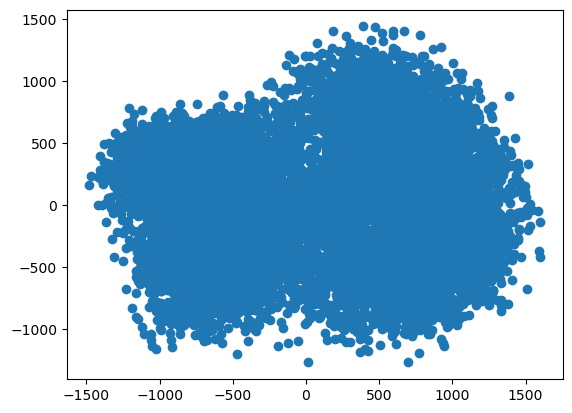

In [16]:
transformed=pca.fit_transform(values)
plt.scatter(transformed[:,0],transformed[:,1])
plt.show()

I see two clusters! Do you? I can color it, and we'll really see:

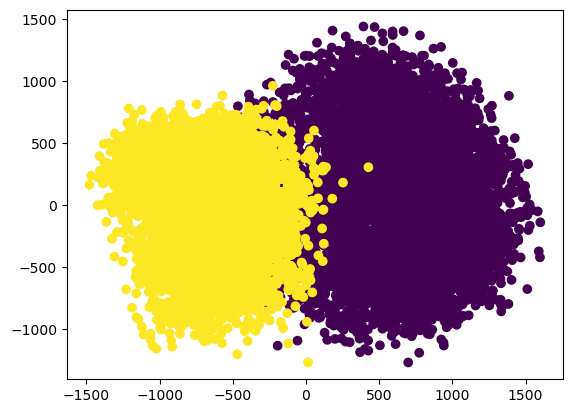

In [17]:
plt.scatter(transformed[:,0],transformed[:,1],c=labels)
plt.show()

The threes and fours are different, even only in two dimensions. Pretty cool!